In [1]:
from main import *

In [2]:
import torch
torch.zeros(1, 3, 224, 224).cuda()

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')

In [3]:
# load data
data_train, data_val = load_data(compression='')

c:\Users\ab901\Downloads\aps360\APS360\venv\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

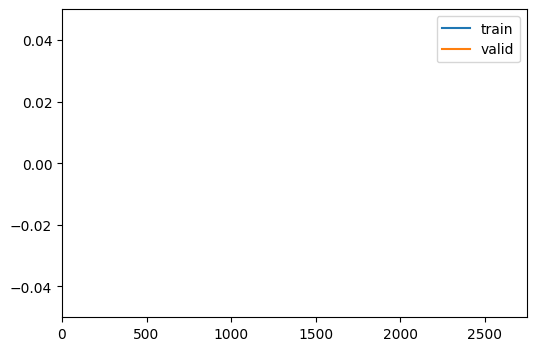

No improvement since epoch -1: early stopping


FileNotFoundError: [Errno 2] No such file or directory: 'models\\64_CEL_Adam_alexnet_0.3.pth'

In [4]:
# reproducibility
stuff.manual_seed(64, True)
# hyperparameters, you should also tweak the layers in the model
batch_size = 64
num_epochs = 50
loss = torch.nn.CrossEntropyLoss
opt = torch.optim.Adam
# parent = alexnet(weights=AlexNet_Weights.DEFAULT).features  # not the actual model but the model were transferring learning from
parent = m.resnet18(weights='DEFAULT')  # to change the model to transfer learning from, just pick one from the link i sent you, take a look at the layers
parent.fc = nn.Identity()  # remove or only select desired layers
dropout_prob = 0.3
# init model and train
model = Model(dropout_prob, parent, 512)
# training
name = stuff.generate_name(batch_size, loss, opt, 'alexnet', dropout_prob)
learner = train(name, model, num_epochs, batch_size, data_train, data_val, loss, opt)

In [45]:
summary(learner.model)

Layer (type:depth-idx)                        Param #
Model                                         --
├─ResNet: 1-1                                 --
│    └─Conv2d: 2-1                            9,408
│    └─BatchNorm2d: 2-2                       128
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   73,984
│    │    └─BasicBlock: 3-2                   73,984
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-3                   230,144
│    │    └─BasicBlock: 3-4                   295,424
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-5                   919,040
│    │    └─BasicBlock: 3-6                   1,180,672
│    └─Sequential: 2-8                        --
│    │    └─BasicBlock: 3-7                   3,673,088
│    │    └─BasicBlock: 3-8                   4,720,640
│    └─AdaptiveA